In [30]:
# importing libraries for ML Customer Segmentation Project:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [55]:
# Load the dataset
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [57]:
# Read the dataset
customer_dataset = pd.read_csv("/content/Mall_Customers.csv")

In [58]:
customer_dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [59]:
# shape of our dataset:
customer_dataset.shape

# statistical analysis of our dataset:
customer_dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [60]:
# Checking type of columns present in our dataset:
customer_dataset.dtypes

# Checking number of rows and columns present in the dataset:
customer_dataset.info()

# check any null values present in the dataset:
customer_dataset.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [61]:
# drop the CustomerID column:

customer_dataset.drop(['CustomerID'], axis = 1, inplace= True)

# checking the modified dataset:

customer_dataset.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [62]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
customer_dataset['Gender'] = label_encoder.fit_transform(customer_dataset['Gender'])


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

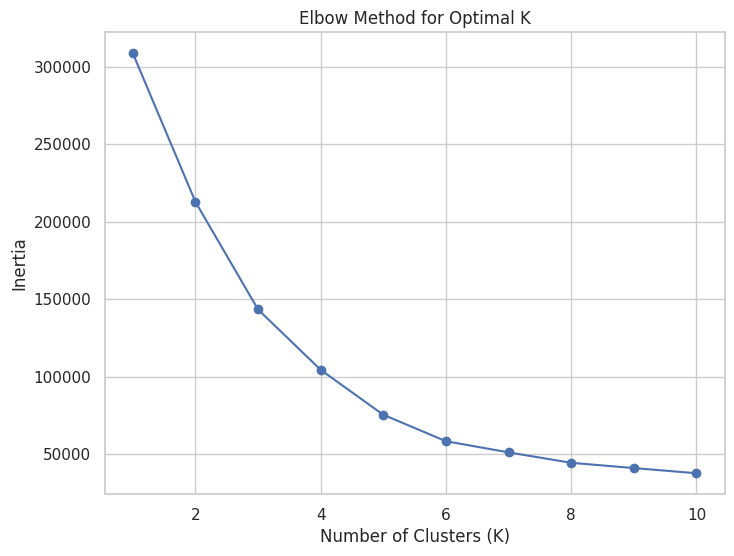

In [63]:
inertia = []

# Define a range of K values to test
k_range = range(1, 11)

# Iterate through the K values and compute the inertia for each
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(customer_dataset)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()

<ipython-input-64-ed5231a45abd>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(customer_dataset[x], bins = 20)


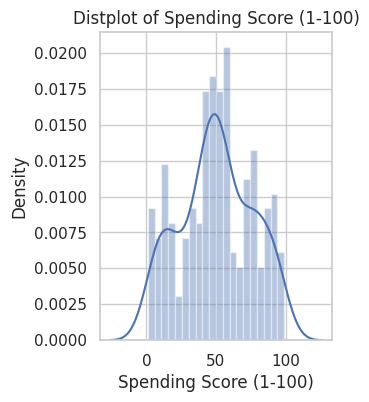

In [64]:
plt.figure(1, figsize=(12,4))
n = 0
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
  n+=1
plt.subplot(1,3,n)
plt.subplots_adjust(hspace= 0.5, wspace=0.5)
sns.distplot(customer_dataset[x], bins = 20)
plt.title('Distplot of {}'.format(x))
plt.show()

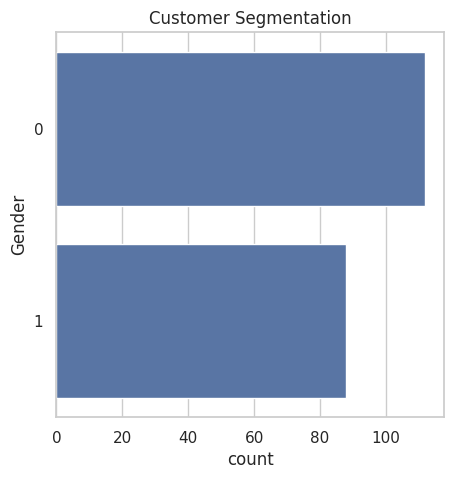

In [65]:
plt.figure(figsize=(5,5))
sns.countplot(y = 'Gender' , data = customer_dataset)
plt.title('Customer Segmentation')
plt.show()

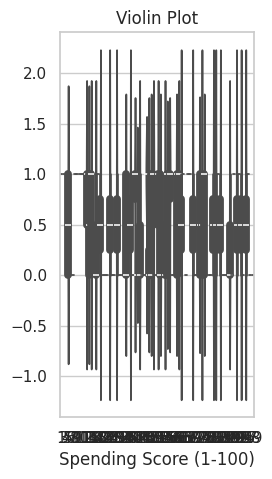

In [66]:
plt.figure(1, figsize=(10,5))
n = 0
for cols in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
  n+=1
plt.subplot(1,3,n)
sns.set(style = 'whitegrid')
plt.subplots_adjust(hspace= 0.5, wspace=0.5)
sns.violinplot(x = cols,y = 'Gender', data = customer_dataset)
plt.ylabel('Gender' if n==1 else '')
plt.title('Violin Plot')
plt.show()

<ipython-input-67-0400f2abb070>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = agex, y = agey , palette='plasma')


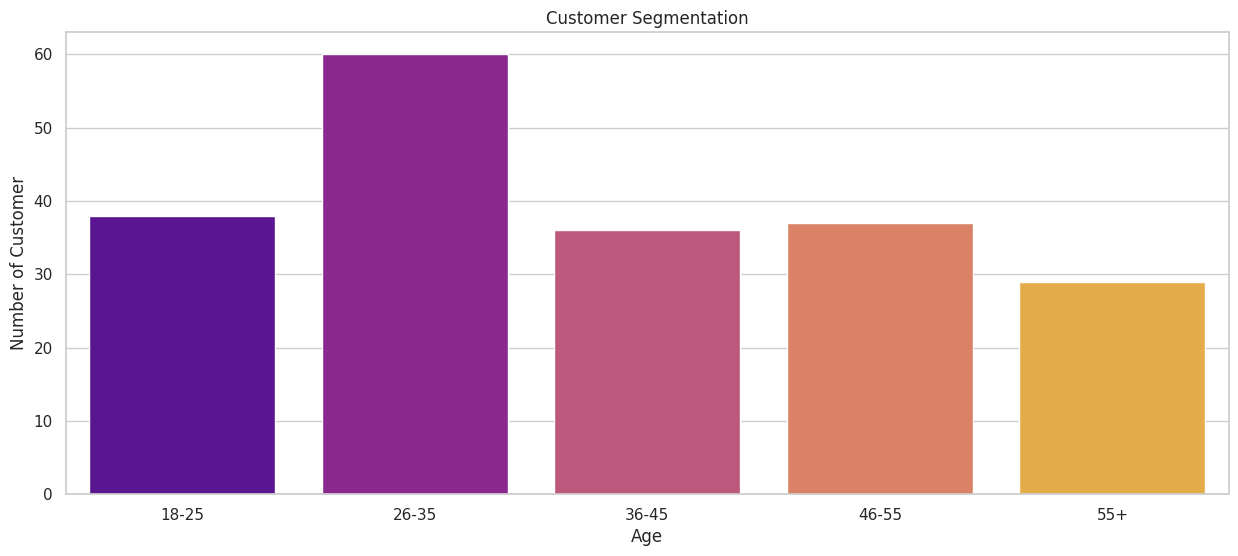

In [67]:
# Creating group of ages:
age_18_25 = customer_dataset.Age[(customer_dataset.Age >= 18) & (customer_dataset.Age <= 25)]
age_26_35 = customer_dataset.Age[(customer_dataset.Age >= 26) & (customer_dataset.Age <= 35)]
age_36_45 = customer_dataset.Age[(customer_dataset.Age >= 36) & (customer_dataset.Age <= 45)]
age_46_55 = customer_dataset.Age[(customer_dataset.Age >= 46) & (customer_dataset.Age <= 55)]
age_above_55 = customer_dataset.Age[(customer_dataset.Age >= 56)]

agex = ['18-25', '26-35', '36-45','46-55','55+']
agey = [len(age_18_25.values),len(age_26_35.values),len(age_36_45.values),len(age_46_55.values),len(age_above_55.values)]

plt.figure(figsize = (15,6))
sns.barplot(x = agex, y = agey , palette='plasma')
plt.title('Customer Segmentation')
plt.xlabel('Age')
plt.ylabel('Number of Customer')
plt.show()

<ipython-input-68-8f1af7544e6a>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = ssx, y = ssy, palette='muted')


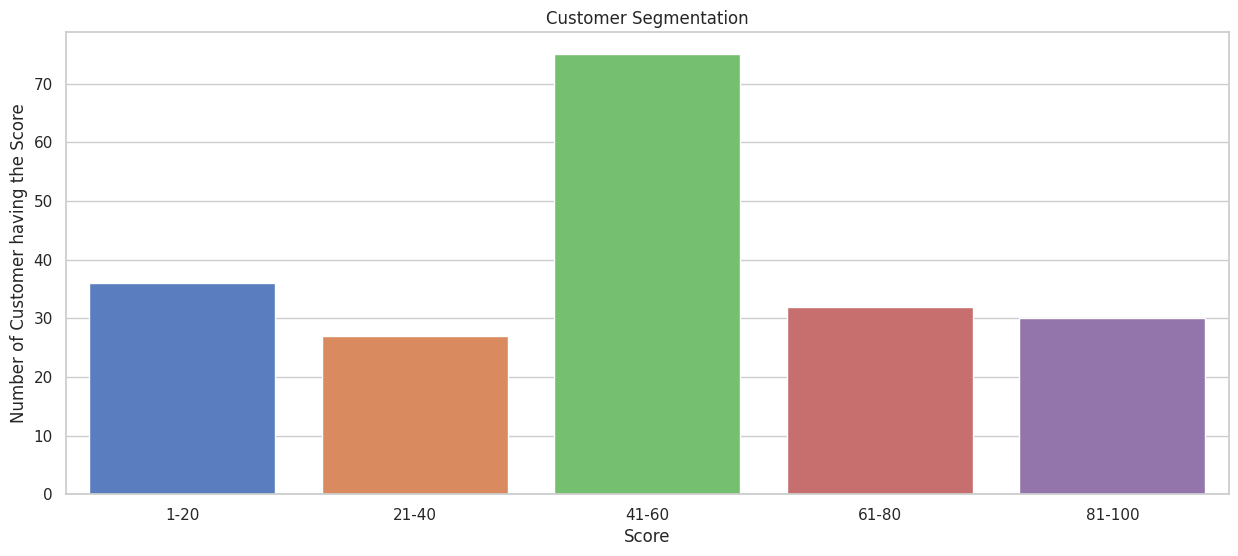

In [68]:
# Creating groups of ‘Spending Score’ column and visualizing it:
ss_1_20 = customer_dataset['Spending Score (1-100)'][(customer_dataset['Spending Score (1-100)'] >= 1) & (customer_dataset['Spending Score (1-100)'] <= 20)]
ss_21_40 = customer_dataset['Spending Score (1-100)'][(customer_dataset['Spending Score (1-100)'] >= 21) & (customer_dataset['Spending Score (1-100)'] <= 40)]
ss_41_60 = customer_dataset['Spending Score (1-100)'][(customer_dataset['Spending Score (1-100)'] >= 41) & (customer_dataset['Spending Score (1-100)'] <= 60)]
ss_61_80 = customer_dataset['Spending Score (1-100)'][(customer_dataset['Spending Score (1-100)'] >= 61) & (customer_dataset['Spending Score (1-100)'] <= 80)]
ss_81_100 = customer_dataset['Spending Score (1-100)'][(customer_dataset['Spending Score (1-100)'] >= 81) & (customer_dataset['Spending Score (1-100)'] <= 100)]

ssx = ['1-20','21-40','41-60','61-80','81-100']
ssy = [len(ss_1_20.values),len(ss_21_40.values),len(ss_41_60.values),len(ss_61_80.values),len(ss_81_100.values)]

plt.figure(figsize=(15,6))
sns.barplot(x = ssx, y = ssy, palette='muted')
plt.title('Customer Segmentation')
plt.xlabel('Score')
plt.ylabel('Number of Customer having the Score')
plt.show()

<ipython-input-69-aef97599814f>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = annx, y = anny, palette='viridis')


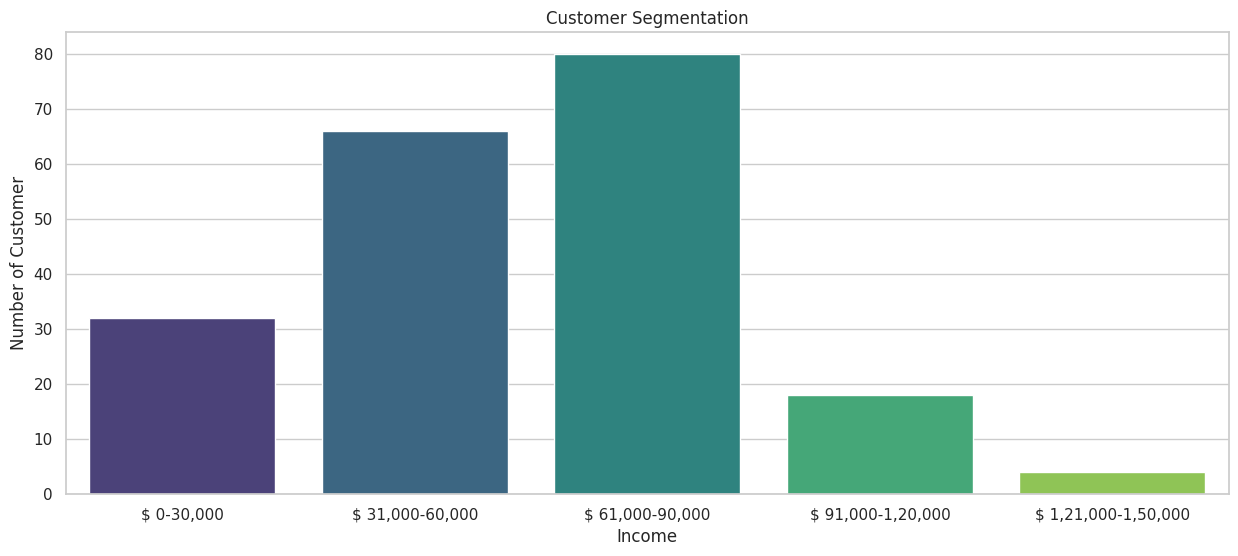

In [69]:
# Creating groups for ‘Annual Income’ column and visualizing it:

ann_0_30 = customer_dataset['Annual Income (k$)'][(customer_dataset['Annual Income (k$)'] >= 0 ) & (customer_dataset['Annual Income (k$)'] <= 30)]
ann_31_60 = customer_dataset['Annual Income (k$)'][(customer_dataset['Annual Income (k$)'] >= 31 ) & (customer_dataset['Annual Income (k$)'] <= 60)]
ann_61_90 = customer_dataset['Annual Income (k$)'][(customer_dataset['Annual Income (k$)'] >= 61 ) & (customer_dataset['Annual Income (k$)'] <= 90)]
ann_91_120 = customer_dataset['Annual Income (k$)'][(customer_dataset['Annual Income (k$)'] >= 91 ) & (customer_dataset['Annual Income (k$)'] <= 120)]
ann_121_150 = customer_dataset['Annual Income (k$)'][(customer_dataset['Annual Income (k$)'] >= 121 ) & (customer_dataset['Annual Income (k$)'] <= 150)]

annx = ['$ 0-30,000','$ 31,000-60,000','$ 61,000-90,000','$ 91,000-1,20,000','$ 1,21,000-1,50,000']
anny = [len(ann_0_30.values),len(ann_31_60.values),len(ann_61_90.values),len(ann_91_120.values),len(ann_121_150.values)]

plt.figure(figsize=(15,6))
sns.barplot(x = annx, y = anny, palette='viridis')
plt.title('Customer Segmentation')
plt.xlabel('Income')
plt.ylabel('Number of Customer')
plt.show()

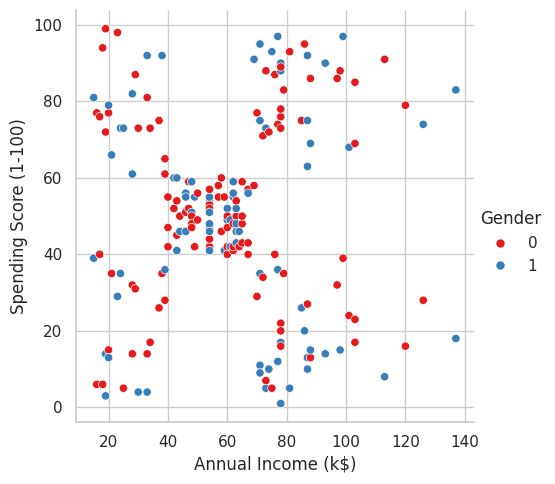

In [70]:

# Assuming 'Gender' is the column you want to use for coloring
sns.relplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', data=customer_dataset, palette='Set1')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

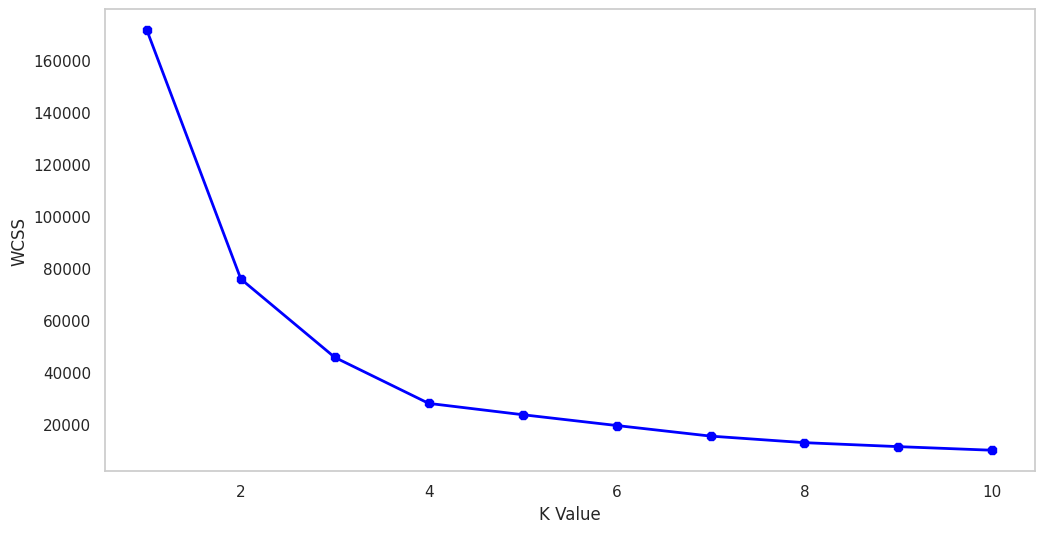

In [71]:
# Creating Clusters based on Age and Spending Score:
X1= customer_dataset.loc[:,['Age','Spending Score (1-100)']].values
from sklearn.cluster import KMeans
wcss=[]
for k in range(1,11):
  kmeans = KMeans(n_clusters = k, init = 'k-means++')
  kmeans.fit(X1)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11), wcss, linewidth = 2, color = 'blue', marker = '8')
plt.xlabel('K Value')
plt.ylabel('WCSS')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[1 3 2 3 1 3 2 3 2 3 2 3 2 3 2 3 1 1 2 3 1 3 2 3 2 3 2 1 2 3 2 3 2 3 2 3 2
 3 2 3 0 3 0 1 2 1 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0
 0 1 0 1 1 0 0 1 0 0 1 0 0 1 1 0 0 1 0 1 1 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 0 0 1 1 1 3 1 3 0 3 2 3 2 3 1 3 2 3 2 3 2 3 2 3 1 3 2 3 0 3
 2 3 2 3 2 3 2 3 2 3 2 3 0 3 2 3 2 3 2 3 2 1 2 3 2 3 2 3 2 3 2 3 2 3 2 3 1
 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3]
[[55.70833333 48.22916667]
 [27.61702128 49.14893617]
 [43.29166667 15.02083333]
 [30.1754386  82.35087719]]


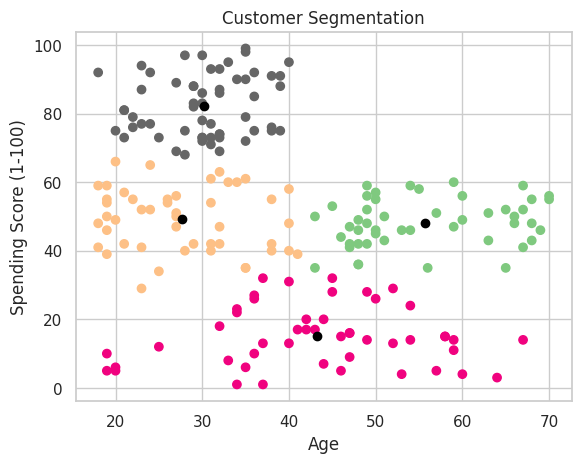

In [72]:
kmeans = KMeans(n_clusters = 4)
label = kmeans.fit_predict(X1)

print(label)

print(kmeans.cluster_centers_)

# Visualize our clusters(basically different groups):

plt.scatter(X1[:,0],X1[:,1], c=kmeans.labels_,cmap = 'Accent')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color = 'black')
plt.title('Customer Segmentation')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

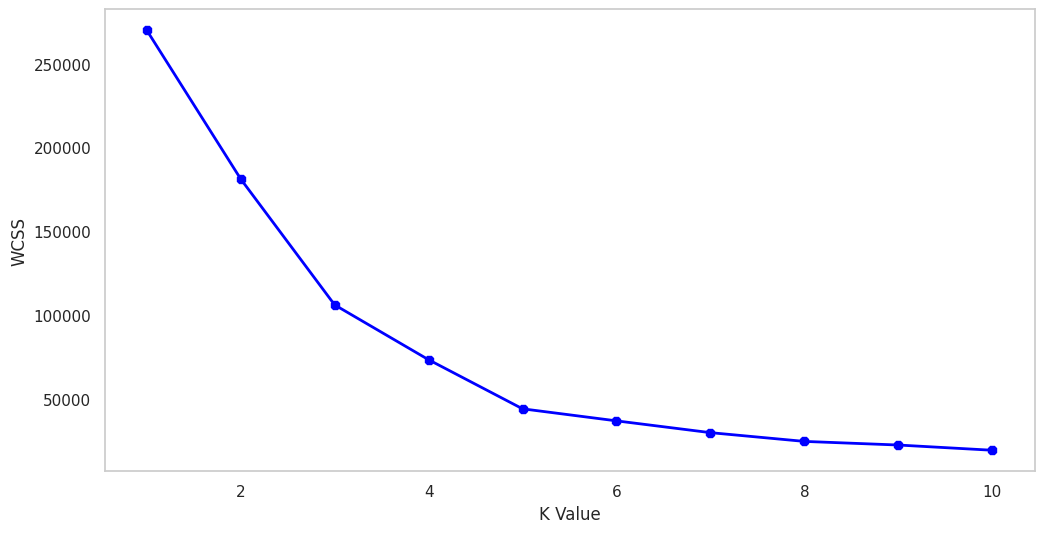

In [73]:
# Creating Clusters based on Annual Income and Spending Score:
X2 = customer_dataset.loc[:,['Annual Income (k$)','Spending Score (1-100)']].values

from sklearn.cluster import KMeans
wcss=[]
for k in range(1,11):
  kmeans = KMeans(n_clusters = k, init = 'k-means++')
  kmeans.fit(X2)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11), wcss, linewidth = 2, color = 'blue', marker = '8')
plt.xlabel('K Value')
plt.ylabel('WCSS')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]
[[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [88.2        17.11428571]
 [26.30434783 20.91304348]
 [25.72727273 79.36363636]]


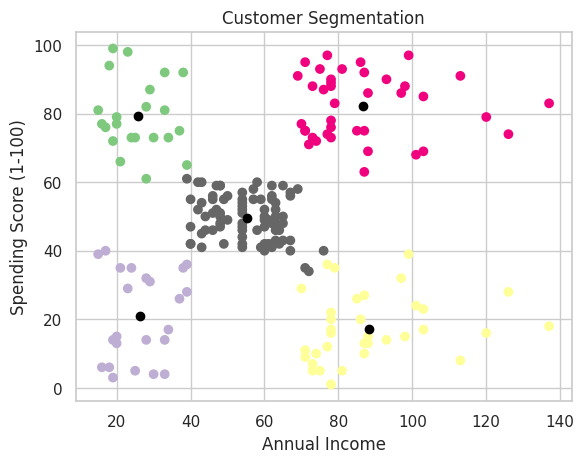

In [74]:
kmeans = KMeans(n_clusters = 5)
label = kmeans.fit_predict(X2)

print(label)

print(kmeans.cluster_centers_)

# visualize clusters:

plt.scatter(X2[:,0],X2[:,1], c=kmeans.labels_,cmap = 'Accent_r')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color = 'black')
plt.title('Customer Segmentation')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score (1-100)')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

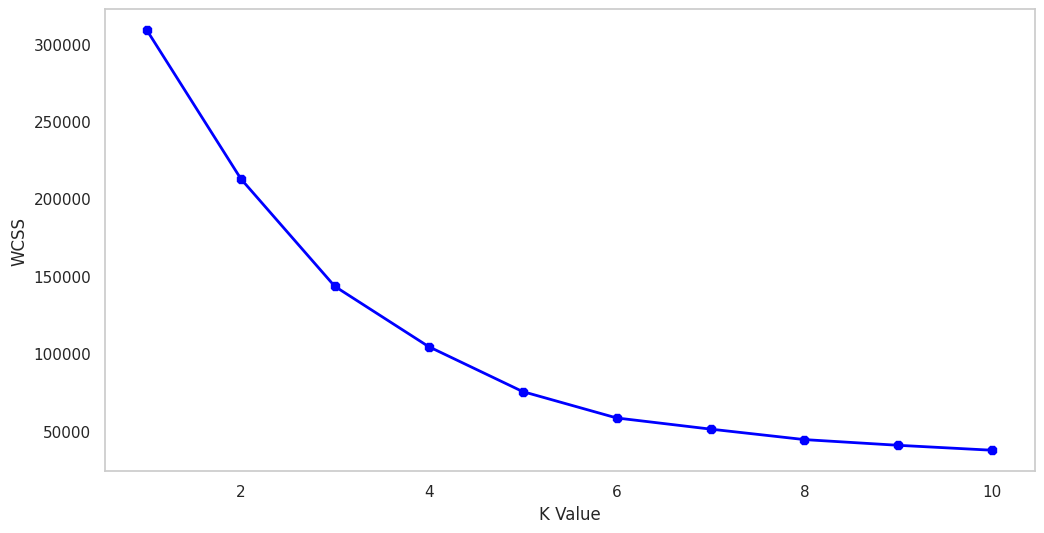

[0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0
 3 0 3 0 3 0 3 0 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 4 1 2 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 2 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1]
[[45.2173913  26.30434783 20.91304348]
 [32.69230769 86.53846154 82.12820513]
 [43.08860759 55.29113924 49.56962025]
 [25.52173913 26.30434783 78.56521739]
 [40.66666667 87.75       17.58333333]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [75]:
# @title
# Creating a Clusters based on Age, Annual Income, and Spending Score:
X3 = customer_dataset.iloc[:,1:]

wcss=[]
for k in range(1,11):
  kmeans = KMeans(n_clusters = k, init = 'k-means++')
  kmeans.fit(X3)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11), wcss, linewidth = 2, color = 'blue', marker = '8')
plt.xlabel('K Value')
plt.ylabel('WCSS')
plt.show()


# similarly as we have done above fit it and find centroids:

kmeans = KMeans(n_clusters = 5)
label = kmeans.fit_predict(X3)

print(label)

print(kmeans.cluster_centers_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


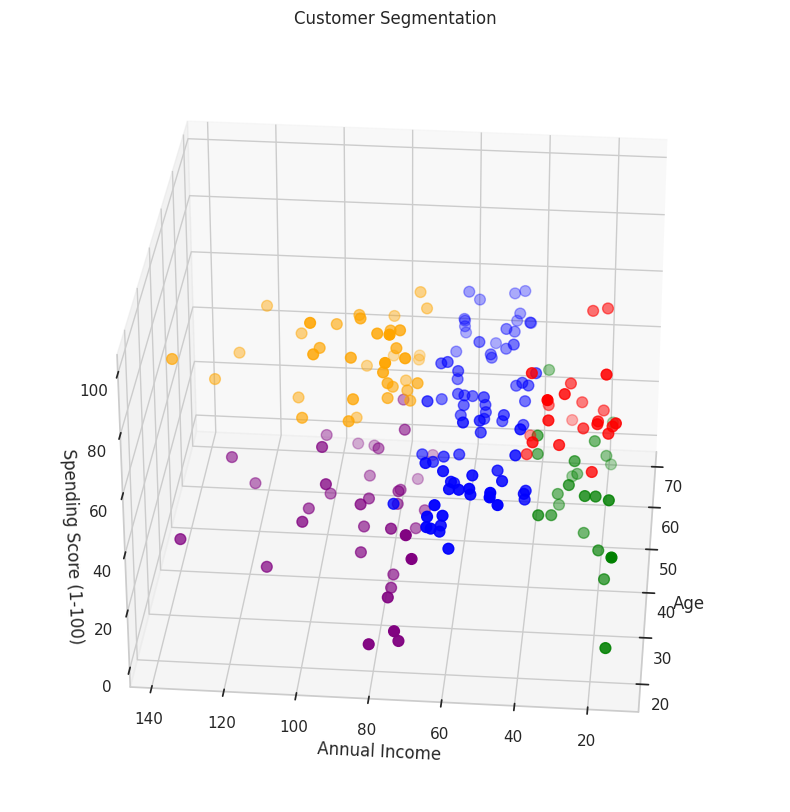

In [76]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

clusters = kmeans.fit_predict(X3)
customer_dataset['label'] = clusters


fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(customer_dataset.Age[customer_dataset.label == 0], customer_dataset['Annual Income (k$)'][customer_dataset.label == 0], customer_dataset['Spending Score (1-100)'][customer_dataset.label == 0], c = 'blue', s = 60)
ax.scatter(customer_dataset.Age[customer_dataset.label == 1], customer_dataset['Annual Income (k$)'][customer_dataset.label == 1], customer_dataset['Spending Score (1-100)'][customer_dataset.label == 1], c = 'red', s = 60)
ax.scatter(customer_dataset.Age[customer_dataset.label == 2], customer_dataset['Annual Income (k$)'][customer_dataset.label == 2], customer_dataset['Spending Score (1-100)'][customer_dataset.label == 2], c = 'green', s = 60)
ax.scatter(customer_dataset.Age[customer_dataset.label == 3], customer_dataset['Annual Income (k$)'][customer_dataset.label == 3], customer_dataset['Spending Score (1-100)'][customer_dataset.label == 3], c = 'orange', s = 60)
ax.scatter(customer_dataset.Age[customer_dataset.label == 4], customer_dataset['Annual Income (k$)'][customer_dataset.label == 4], customer_dataset['Spending Score (1-100)'][customer_dataset.label == 4], c = 'purple', s = 60)
ax.view_init(30,185)

plt.title('Customer Segmentation')
plt.xlabel('Age')
plt.ylabel('Annual Income')
ax.set_zlabel('Spending Score (1-100)')

plt.show()

In [77]:
customer_dataset['cluster'] = kmeans.labels_


In [78]:

# Calculate the mean values for each feature within each cluster
cluster_means = customer_dataset.groupby('cluster').mean()

# Display the cluster characteristics
print(cluster_means)


           Gender        Age  Annual Income (k$)  Spending Score (1-100)  \
cluster                                                                    
0        0.417722  43.088608           55.291139               49.569620   
1        0.391304  25.521739           26.304348               78.565217   
2        0.391304  45.217391           26.304348               20.913043   
3        0.461538  32.692308           86.538462               82.128205   
4        0.527778  40.666667           87.750000               17.583333   

         label  
cluster         
0          0.0  
1          1.0  
2          2.0  
3          3.0  
4          4.0  


In [79]:
# Analyze each segment
segment_data = []

for cluster_id, cluster_data in customer_dataset.groupby('cluster'):
    # Perform segment-specific analysis here
    # You can calculate statistics, generate insights, or run additional models for each segment
    # For example, you can calculate average spending score or frequency for each segment

    # Append the results to the segment_data list
    segment_analysis = {
        'Cluster': cluster_id,
        'Average_Spending_Score': cluster_data['Spending Score (1-100)'].mean(),
        'Segment_Size': len(cluster_data),
        # Add more segment-specific metrics here
    }
    segment_data.append(segment_analysis)

# Create a DataFrame to store the segment-specific analysis
segment_df = pd.DataFrame(segment_data)

# Display the segment-specific analysis
print(segment_df)

# Develop marketing strategies based on the analysis
# You can tailor marketing campaigns, product recommendations, or customer engagement strategies for each segment


   Cluster  Average_Spending_Score  Segment_Size
0        0               49.569620            79
1        1               78.565217            23
2        2               20.913043            23
3        3               82.128205            39
4        4               17.583333            36


In [80]:
# Calculate the mean spending score for each cluster
cluster_spending_score = customer_dataset.groupby('cluster')['Spending Score (1-100)'].mean()

# Sort clusters by mean spending score in descending order
cluster_spending_score_sorted = cluster_spending_score.sort_values(ascending=False)

# Get the top cluster with the highest spending score
top_cluster = cluster_spending_score_sorted.index[0]

# Get the segment size of the top cluster
top_cluster_size = len(customer_dataset[customer_dataset['cluster'] == top_cluster])

# Calculate the total spending potential of the top cluster
total_spending_potential = cluster_spending_score_sorted[top_cluster] * top_cluster_size

# Print the top cluster's information
print(f"Top Cluster: {top_cluster}")
print(f"Average Spending Score: {cluster_spending_score_sorted[top_cluster]:.2f}")
print(f"Segment Size: {top_cluster_size}")
print(f"Total Spending Potential: ${total_spending_potential:.2f}")

# Provide recommendations based on the top cluster
print("\nRecommendations:")
if cluster_spending_score_sorted[top_cluster] > 75:
    print("Customers in this segment have high spending scores. Consider offering premium products or services to capitalize on their purchasing power.")
else:
    print("While this segment shows potential, there is room for improvement. Implement targeted marketing campaigns or loyalty programs to increase customer spending.")


Top Cluster: 3
Average Spending Score: 82.13
Segment Size: 39
Total Spending Potential: $3203.00

Recommendations:
Customers in this segment have high spending scores. Consider offering premium products or services to capitalize on their purchasing power.
